In [6]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Full Matrix

In [7]:
# Full Matrices
panteli = pd.read_csv("./full-distances/panteli.csv", header=None)
cantometrics = pd.read_csv("./full-distances/CantoDist.csv")
metric_learn = pd.read_csv("./full-distances/metric_learn.csv", header=None)
musly = pd.read_csv("./full-distances/musly.csv", header=None)

cantometrics = pd.DataFrame(squareform(pdist(cantometrics)))

In [3]:
full_distance = np.zeros((4,4))

In [12]:
!pip install scikit-bio

Processing /Users/compmusic/Library/Caches/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70/scikit_bio-0.5.6-cp37-cp37m-macosx_10_14_x86_64.whl
  Using cached natsort-7.0.1-py3-none-any.whl (33 kB)
  Using cached lockfile-0.12.2-py2.py3-none-any.whl (13 kB)
  Using cached CacheControl-0.12.6-py2.py3-none-any.whl (19 kB)
Processing /Users/compmusic/Library/Caches/pip/wheels/39/0c/15/d577807c98b49ef974f03214a5ea063baddad01c3077c29b69/hdmedians-0.13-cp37-cp37m-macosx_10_14_x86_64.whl


In [13]:
cantometrics.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,1.138181,2.092393,3.162553,4.043556,5.052853,6.069879,7.037497,8.024485,9.022250,...,20.017845,21.021337,22.005266,23.005753,24.009450,25.014192,26.012346,27.012584,28.010457,29.006635
1,1.138181,0.000000,1.135992,2.210449,3.017561,4.037263,5.101115,6.038854,7.024840,8.023277,...,19.012090,20.016243,21.007383,22.008608,23.010210,24.013499,25.020619,26.020050,27.018050,28.012045
2,2.092393,1.135992,0.000000,1.543475,2.060365,3.093542,4.113386,5.028437,6.064625,7.037412,...,18.016247,19.023975,20.008958,21.003009,22.011610,23.009018,24.016652,25.013914,26.011785,27.013255
3,3.162553,2.210449,1.543475,0.000000,1.428659,2.130227,3.083187,4.119000,5.052590,6.062034,...,17.017641,18.008079,19.022154,20.037048,21.022388,22.022642,23.030197,24.031301,25.027688,26.014995
4,4.043556,3.017561,2.060365,1.428659,0.000000,1.139372,2.261925,3.095119,4.054645,5.041911,...,16.015694,17.020403,18.012002,19.009358,20.012674,21.017997,22.024244,23.024506,24.021817,25.016332


In [14]:
import skbio.stats.distance as skb
from skbio import DistanceMatrix

In [15]:
# Panteli Canto
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,1] = p_value
full_distance[1,0] = coeff

In [16]:
# Panteli metric_learn
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(metric_learn))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,2] = p_value
full_distance[2,0] = coeff

In [17]:
# Panteli musly
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,3] = p_value
full_distance[3,0] = coeff

In [18]:
# Canto metric_learn
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(metric_learn))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,2] = p_value
full_distance[2,1] = coeff

In [19]:
# Canto musly
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,3] = p_value
full_distance[3,1] = coeff

In [20]:
# metric_learn musly
x = DistanceMatrix(pd.DataFrame.to_numpy(metric_learn))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[2,3] = p_value
full_distance[3,2] = coeff

/Users/compmusic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


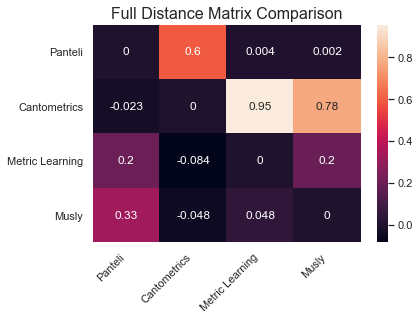

In [21]:
import seaborn as sns
sns.set()
g = sns.heatmap(full_distance, annot=True)
# To display the heatmap 
import matplotlib.pyplot as plt
ticks = ["Panteli","Cantometrics","Metric Learning", "Musly"]
# plt.xticks(np.arange(5),("Panteli","Cantometrics","Metric Learning", "Musly"),rotation="45")
# plt.yticks(np.arange(5),("Panteli","Cantometrics","Metric Learning", "Musly"), rotation="horizontal")
plt.margins(0.2)
g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
ax = plt.axes()
ax.set_title('Full Distance Matrix Comparison', fontsize=16)
plt.show()

# Partial Matrices Flattened

In [159]:
# Partial Matrices
panteli_partial = pd.read_csv("./partial-distances/panteli_partial.csv", header=None)
canto_partial = pd.read_csv("./partial-distances/canto_partial.csv").drop(columns=["Unnamed: 0"])
pairwise_partial = pd.read_csv("./partial-distances/average_pairwise_matrix.csv", header=None)
musly_partial = pd.read_csv("./partial-distances/musly_partial.csv",header=None)

In [160]:
partial = np.zeros((4,4))

for i in range(30):
    for j in range(30):
        if(i!=j):
            pairwise_partial.iloc[i,j]=100-pairwise_partial.iloc[i,j]

In [161]:
pairwise_partial_flat

[47.7272727272727,
 15.909090909090907,
 63.636363636363605,
 52.2727272727273,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 43.1818181818182,
 20.454545454545396,
 13.636363636363598,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 25.0,
 13.636363636363598,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 18.1818181818182,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100

In [162]:
panteli_partial=pd.DataFrame.to_numpy(panteli_partial)
canto_partial=pd.DataFrame.to_numpy(canto_partial)
pairwise_partial=pd.DataFrame.to_numpy(pairwise_partial)
musly_partial=pd.DataFrame.to_numpy(musly_partial)

In [163]:
panteli_partial_flat = []
for i in range(30):
    for j in range(30):
        if(panteli_partial[i][j]!=0 and i<j ):
            panteli_partial_flat.append(panteli_partial[i][j])

In [164]:
canto_partial_flat = []
for i in range(30):
    for j in range(30):
        if(canto_partial[i][j]!=0  and i<j):
            canto_partial_flat.append(canto_partial[i][j])

In [165]:
pairwise_partial_flat= []
for i in range(30):
    for j in range(30):
        if(pairwise_partial[i][j]!=100  and i<j):
            pairwise_partial_flat.append(pairwise_partial[i][j])

In [166]:
musly_partial_flat = []
for i in range(30):
    for j in range(30):
        if(musly_partial[i][j]!=0  and i<j):
            musly_partial_flat.append(musly_partial[i][j])

In [167]:
 from scipy import stats

In [168]:
# panteli_partial_flat canto_partial_flat
coeff, p_value = stats.pearsonr(panteli_partial_flat, canto_partial_flat)
partial[0,1] = p_value
partial[1,0] = coeff

In [169]:
# panteli_partial_flat pairwise
coeff, p_value = stats.pearsonr(panteli_partial_flat, pairwise_partial_flat)
partial[0,2] = p_value
partial[2,0] = coeff

In [170]:
# panteli_partial_flat musly_partial_flat
coeff, p_value = stats.pearsonr(panteli_partial_flat, musly_partial_flat)
partial[0,3] = p_value
partial[3,0] = coeff

Text(0.5, 1.0, 'Cantometrics vs. Pairwise Ratings Scatter Plot')

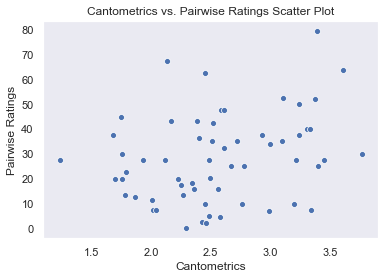

In [171]:
# canto_partial_flat triplet_partial_flat
coeff, p_value = stats.pearsonr(canto_partial_flat, pairwise_partial_flat)
partial[1,2] = p_value
partial[2,1] = coeff

df = pd.DataFrame({'Cantometrics':np.array(canto_partial_flat), 'Pairwise Ratings':pairwise_partial_flat})

ax = sns.scatterplot(x="Cantometrics", y="Pairwise Ratings", data=df)
ax.grid(False)
ax.set_title("Cantometrics vs. Pairwise Ratings Scatter Plot")

In [172]:
# canto_partial_flat triplet_partial_flat
coeff, p_value = stats.pearsonr(canto_partial_flat, musly_partial_flat)
partial[1,3] = p_value
partial[3,1] = coeff

In [173]:
# canto_partial_flat triplet_partial_flat
coeff, p_value = stats.pearsonr(pairwise_partial_flat, musly_partial_flat)
partial[2,3] = p_value
partial[3,2] = coeff

In [174]:
partial

array([[ 0.        ,  0.07292408,  0.75409731,  0.01479079],
       [-0.23321671,  0.        ,  0.02635573,  0.49346881],
       [-0.04129062,  0.28670342,  0.        ,  0.20673695],
       [ 0.31329883,  0.09012324, -0.16535316,  0.        ]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


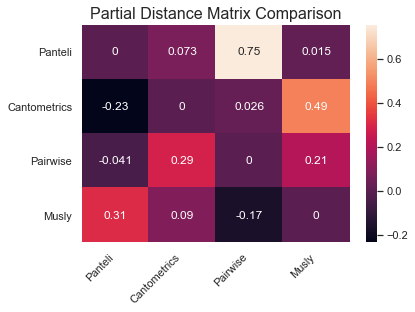

In [175]:
import seaborn as sns
sns.set()
g = sns.heatmap(partial, annot=True)
# To display the heatmap 
import matplotlib.pyplot as plt
ticks = ["Panteli","Cantometrics","Pairwise", "Musly"]
plt.margins(0.2)
g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
ax = plt.axes()
ax.set_title('Partial Distance Matrix Comparison', fontsize=16)
plt.savefig("output.png")
plt.show()

# Individual Partial Matrices
## Six 5x5 matrices

In [197]:
pairwise_partial_1 = pd.read_csv("./partial-distances/pairwise_partial_1.csv", header=None)
pairwise_partial_2 = pd.read_csv("./partial-distances/pairwise_partial_2.csv", header=None)
pairwise_partial_3 = pd.read_csv("./partial-distances/pairwise_partial_3.csv", header=None)
pairwise_partial_4 = pd.read_csv("./partial-distances/pairwise_partial_4.csv", header=None)
pairwise_partial_5 = pd.read_csv("./partial-distances/pairwise_partial_5.csv", header=None)
pairwise_partial_6 = pd.read_csv("./partial-distances/pairwise_partial_6.csv", header=None)

for i in range(5):
    for j in range(5):
        if(i!=j):
            pairwise_partial_1.iloc[i,j]=100-pairwise_partial_1.iloc[i,j]
            pairwise_partial_2.iloc[i,j]=100-pairwise_partial_2.iloc[i,j]
            pairwise_partial_3.iloc[i,j]=100-pairwise_partial_3.iloc[i,j]
            pairwise_partial_4.iloc[i,j]=100-pairwise_partial_4.iloc[i,j]
            pairwise_partial_5.iloc[i,j]=100-pairwise_partial_5.iloc[i,j]
            pairwise_partial_6.iloc[i,j]=100-pairwise_partial_6.iloc[i,j]

In [198]:
canto_partial_1 = canto_partial[0:5,0:5]
canto_partial_2 = canto_partial[5:10,5:10]
canto_partial_3 = canto_partial[10:15,10:15]
canto_partial_4 = canto_partial[15:20,15:20]
canto_partial_5 = canto_partial[20:25,20:25]
canto_partial_6 = canto_partial[25:30,25:30]

In [199]:
musly_partial_1 = musly_partial[0:5,0:5]
musly_partial_2 = musly_partial[5:10,5:10]
musly_partial_3 = musly_partial[10:15,10:15]
musly_partial_4 = musly_partial[15:20,15:20]
musly_partial_5 = musly_partial[20:25,20:25]
musly_partial_6 = musly_partial[25:30,25:30]

In [200]:
panteli_partial_1 = panteli_partial[0:5,0:5]
panteli_partial_2 = panteli_partial[5:10,5:10]
panteli_partial_3 = panteli_partial[10:15,10:15]
panteli_partial_4 = panteli_partial[15:20,15:20]
panteli_partial_5 = panteli_partial[20:25,20:25]
panteli_partial_6 = panteli_partial[25:30,25:30]

In [201]:
from skbio.stats.distance import mantel
from skbio import DistanceMatrix
import seaborn as sns

In [202]:
def visualize_distance_matrix(group_no, data):
    group_no = str(group_no)
    sns.set()
    g = sns.heatmap(data, annot=True)
    # To display the heatmap 
    import matplotlib.pyplot as plt
    ticks = ["Panteli","Cantometrics","Pairwise", "Musly"]
    plt.margins(0.2)
    # plt.gcf().subplots_adjust(bottom=0.25)
    g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
    g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
    ax = plt.axes()
    ax.set_title('Partial Distance Matrix Group '+group_no, fontsize=16)
    plt.savefig("./figs/partial-distance-matrices/partial_dist_"+group_no+".png")
    plt.show()

In [203]:
def populate_matrix(panteli_partial, canto_partial, pairwise_partial, musly_partial):
    
    partial = np.zeros((4,4))

    # Panteli Canto
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(canto_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,1] = p_value
    partial[1,0] = coeff

    # Panteli Pairwise
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(pairwise_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,2] = p_value
    partial[2,0] = coeff

    # Panteli Musly
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,3] = p_value
    partial[3,0] = coeff

    # Canto Pairwise
    x = DistanceMatrix(canto_partial)
    y = DistanceMatrix(pairwise_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[1,2] = p_value
    partial[2,1] = coeff

    # Canto Musly
    x = DistanceMatrix(canto_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[1,3] = p_value
    partial[3,1] = coeff

    # Pairwise Musly
    x = DistanceMatrix(pairwise_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[2,3] = p_value
    partial[3,2] = coeff
    
    return partial

In [204]:
def flatten(df):
    flat = []
    for i in range(5):
        for j in range(5):
            if(i<j):
                flat.append(df.iloc[i,j])
    return flat

In [205]:
def flatten_df(df):
    flat = []
    for i in range(5):
        for j in range(5):
            if(i<j):
                flat.append(df[i,j])
    return flat

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


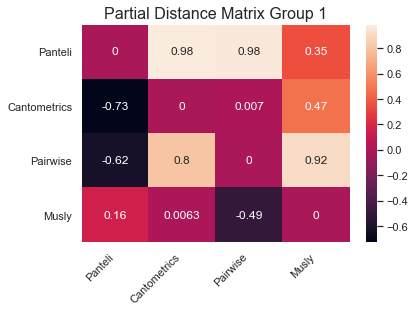

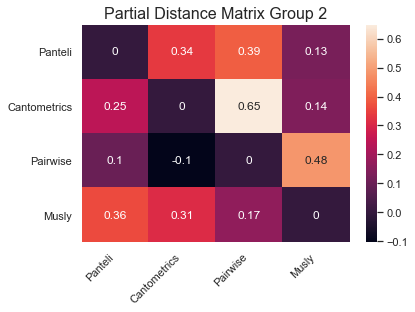

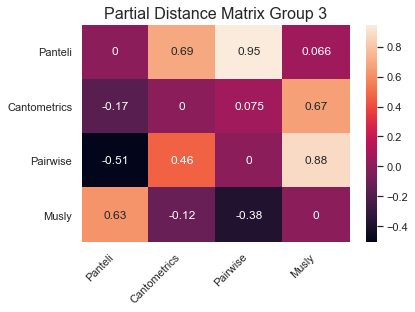

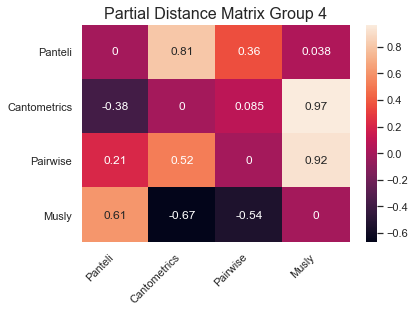

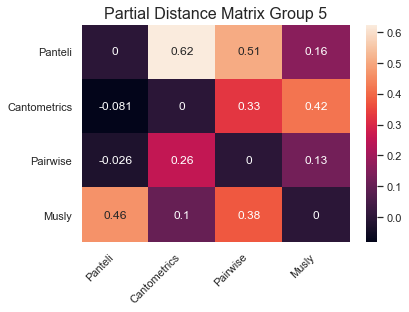

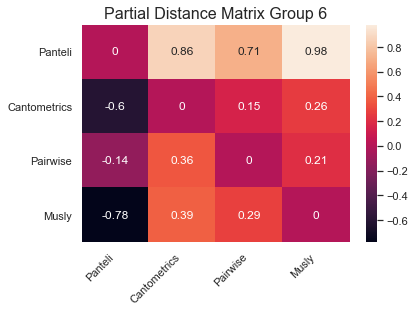

In [206]:
partial_1 = populate_matrix(panteli_partial_1, canto_partial_1, pairwise_partial_1, musly_partial_1)
visualize_distance_matrix(1,partial_1)

partial_2 = populate_matrix(panteli_partial_2, canto_partial_2, pairwise_partial_2, musly_partial_2)
visualize_distance_matrix(2,partial_2)

partial_3 = populate_matrix(panteli_partial_3, canto_partial_3, pairwise_partial_3, musly_partial_3)
visualize_distance_matrix(3,partial_3)

partial_4 = populate_matrix(panteli_partial_4, canto_partial_4, pairwise_partial_4, musly_partial_4)
visualize_distance_matrix(4,partial_4)

partial_5 = populate_matrix(panteli_partial_5, canto_partial_5, pairwise_partial_5, musly_partial_5)
visualize_distance_matrix(5,partial_5)

partial_6 = populate_matrix(panteli_partial_6, canto_partial_6, pairwise_partial_6, musly_partial_6)
visualize_distance_matrix(6,partial_6)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


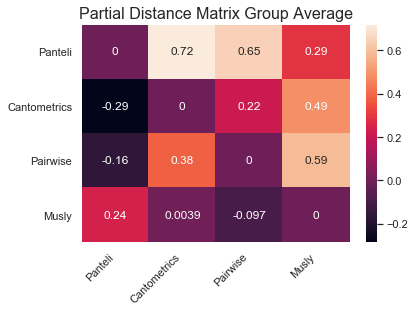

In [207]:
partial_average = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        partial_average[i,j] = (partial_1[i,j]+partial_2[i,j]+partial_3[i,j]+partial_4[i,j]+partial_5[i,j]+partial_6[i,j])/6
visualize_distance_matrix("Average",partial_average)

## Scatter Plots

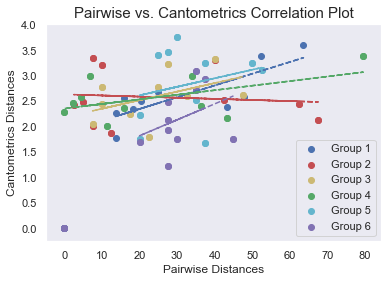

<Figure size 432x288 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

fig = plt.figure()
ax1 = fig.add_subplot(111)

b, m = polyfit(flatten(pairwise_partial_1), flatten_df(canto_partial_1), 1)
flat = flatten(pairwise_partial_1)
ax1.scatter(flat, flatten_df(canto_partial_1), c='b', label='Group 1')
ax1.plot(flat, b+[x*m for x in flat], "b--")


b, m = polyfit(flatten(pairwise_partial_2), flatten_df(canto_partial_2), 1)
flat = flatten(pairwise_partial_2)
ax1.scatter(pairwise_partial_2, canto_partial_2, c='r', label='Group 2')
ax1.plot(flat, b+[x*m for x in flat],"r--",)

b, m = polyfit(flatten(pairwise_partial_3), flatten_df(canto_partial_3), 1)
flat = flatten(pairwise_partial_3)
ax1.scatter(pairwise_partial_3, canto_partial_3, c='y', label='Group 3')
ax1.plot(flat, b+[x*m for x in flat],"--", c="y")

b, m = polyfit(flatten(pairwise_partial_4), flatten_df(canto_partial_4), 1)
flat = flatten(pairwise_partial_4)
ax1.scatter(pairwise_partial_4, canto_partial_4, c='g', label='Group 4')
ax1.plot(flat, b+[x*m for x in flat],"--",c="g")


b, m = polyfit(flatten(pairwise_partial_5), flatten_df(canto_partial_5), 1)
flat = flatten(pairwise_partial_5)
ax1.scatter(pairwise_partial_5, canto_partial_5, c='c', label='Group 5')
ax1.plot(flat, b+[x*m for x in flat],"--",c="c")

b, m = polyfit(flatten(pairwise_partial_6), flatten_df(canto_partial_6), 1)
flat = flatten(pairwise_partial_6)
ax1.scatter(pairwise_partial_6, canto_partial_6, c='m', label='Group 6')
ax1.plot(flat, b+[x*m for x in flat],"--",c="m")

ax1.grid(False)

plt.xlabel("Pairwise Distances");
plt.ylabel("Cantometrics Distances")
plt.title("Pairwise vs. Cantometrics Correlation Plot", fontsize=15)
plt.legend(loc='lower right');
plt.show()

plt.savefig("./figs/scatter.png")